<a href="https://colab.research.google.com/github/macscheffer/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module1-OLS-regression/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [1397]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [1398]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = df.loc[:, ['sqft_living']].values
y = df.loc[:,['price']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train.shape

(10806, 1)

In [0]:

lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))

In [1400]:
rmse, oos_mse, oos_r2

(264922.5093359429, 70183935952.85275, 0.49748010409939525)

In [1401]:
# this is pretty bad lol
mean_absolute_error

<function sklearn.metrics.regression.mean_absolute_error>

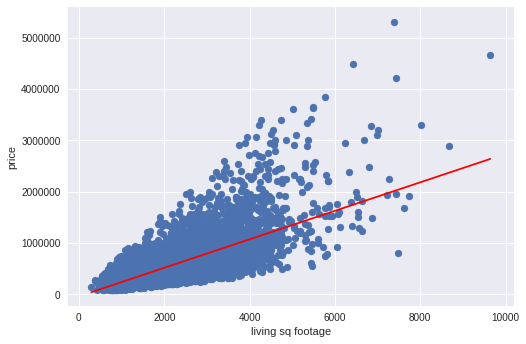

In [1402]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

X_plot = np.arange(X_train.min(), X_train.max(), 1)

ax.plot(X_plot, lr.predict(X_plot.reshape(-1,1)), c='red', label='Line of Best Fit')
plt.scatter(X_train, y_train)

plt.xlabel('living sq footage')
plt.ylabel('price');

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [1403]:
df.condition.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [0]:
features = ['sqft_living', 'condition']
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

In [0]:
lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)


In [1406]:
oos_mse, oos_r2

(69267055437.67192, 0.5028743390553616)

In [0]:
# still pretty bad. 

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
X = df.drop(columns=['price', 'id', 'date','zipcode', 'yr_renovated','yr_built'])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)


In [1409]:
oos_mse, np.sqrt(oos_mse)

(43000076585.85708, 207364.59819809426)

In [1410]:
oos_r2

0.6789021295343085

In [0]:
df['yrs_since_built']  = pd.to_datetime(df.date).dt.year - df.yr_built

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)


In [1412]:
X = df.loc[:, ['sqft_living']].values
y = df.loc[:,['price']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train.shape

lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)

oos_mse, oos_r2

(68957636113.5937, 0.49432228865696026)

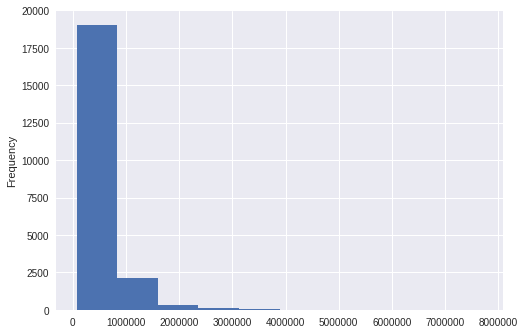

In [1413]:
df.price.plot.hist()

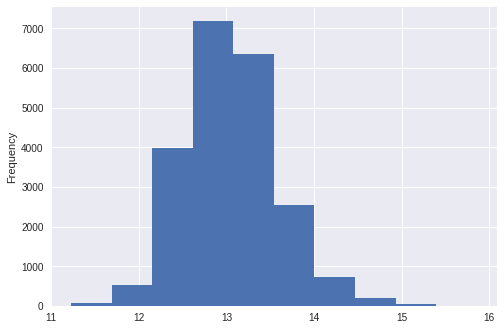

In [1414]:
np.log(df.price).plot.hist()

In [0]:
df['log_price'] = np.log(df.price)

In [0]:
df['sqft_living_squared'] = df.sqft_living ** 2
df['sqft_living_log'] = np.log(df.sqft_living)

In [1417]:
# mse, r2 of sq footage on just price (72999180594.88026, 0.4987502186736058)

X = df.loc[:, ['sqft_living']].values
y = df.loc[:,['log_price']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train.shape

lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse ,oos_mse, oos_r2

(0.3777591600746869, 0.14270198302033293, 0.48941175217520416)

In [1418]:
# mse, r2 of sq footage on just price (72999180594.88026, 0.4987502186736058)

X = df.loc[:, ['sqft_living_squared']].values
y = df.loc[:,['price']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train.shape

lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse ,oos_mse, oos_r2

(260248.93887627148, 67729510186.225296, 0.5058139210499091)

In [1419]:
# mse, r2 of sq footage on just price (72999180594.88026, 0.4987502186736058)

X = df.loc[:, ['sqft_living_log']].values
y = df.loc[:,['log_price']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train.shape

lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse ,oos_mse, oos_r2

(0.3884527449462707, 0.15089553505629244, 0.4578819080730203)

In [1420]:
# mse, r2 of sq footage on just price (72999180594.88026, 0.4987502186736058)

X = df.loc[:, ['grade']].values
y = df.loc[:,['log_price']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train.shape

lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse ,oos_mse, oos_r2

(0.3759558327654256, 0.14134278819034468, 0.4958029628634929)

In [0]:
# just exploring. okay lets try to make some good predictions

In [0]:
df['grade_squared'] = df.grade ** 2

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


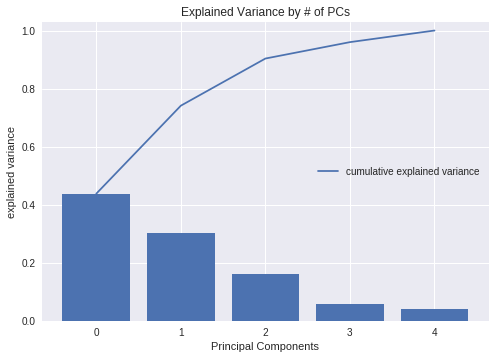

In [1422]:
# i want to try to cluster some by sqft_living, sqft_lot, sqft_basement, sqft_living15, sqft_lot15

cols = ['sqft_living', 'sqft_lot', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

std_sc = StandardScaler()
df_std = std_sc.fit_transform(df[cols])

pca_all = PCA(5)
pc_all = pca_all.fit_transform(X=df_std)

plt.bar(range(0,5), pca_all.explained_variance_ratio_)
plt.plot(range(0,5), [sum(pca_all.explained_variance_ratio_[0:i]) for i in range(1,6)], label='cumulative explained variance')

plt.xlabel('Principal Components')
plt.ylabel('explained variance')
plt.title('Explained Variance by # of PCs')
plt.legend(loc=7)
plt.ylim(0,1.03)
plt.show()

In [0]:
pca_2_df = pd.DataFrame({'pc1': pc_all[:,0], 'pc2': pc_all[:,1]})
pca_3_df = pd.DataFrame({'pc1': pc_all[:,0], 'pc2': pc_all[:,1], 'pc3': pc_all[:,2]})


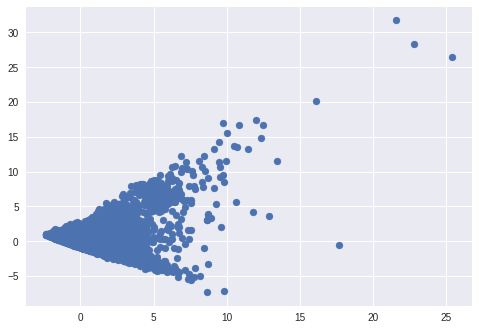

In [1424]:
# this does not look like its doing a very good job.
plt.scatter(x='pc1', y='pc2', data=pca_2_df)

In [0]:
km = KMeans(n_clusters=2)
km = km.fit(pca_2_df[['pc1', 'pc2']])
pca_2_df['2_means_label'] = km.labels_
df['pca2_2_means_label'] = km.labels_

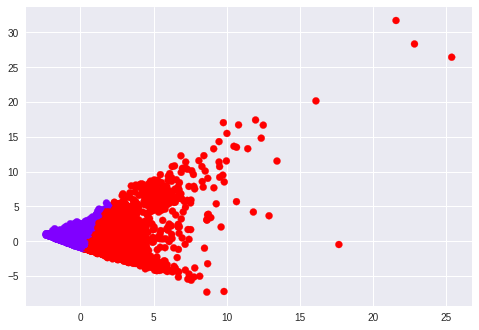

In [1426]:
c = pca_2_df['2_means_label']
plt.scatter(x='pc1', y='pc2', data=pca_2_df, c=c)

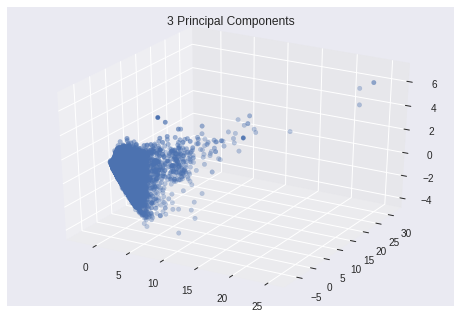

In [1427]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('3 Principal Components')
ax.scatter(pca_3_df.pc1, pca_3_df.pc2, pca_3_df.pc3);

In [1428]:
df.pivot_table(index='pca2_2_means_label', values='price')

,price
pca2_2_means_label,
0,418656.176770
1,822240.531601


In [0]:
km = KMeans(n_clusters=3)
km = km.fit(pca_2_df[['pc1', 'pc2']])
pca_2_df['2_means_label'] = km.labels_
df['pca2_3_means_label'] = km.labels_

In [1430]:
# not as good i like the binary 2 means label.
df.pivot_table(index='pca2_3_means_label', values='price')

,price
pca2_3_means_label,
0,654699.559585
1,408566.863379
2,794731.609557


In [0]:
km = KMeans(n_clusters=2)
km = km.fit(pca_3_df[['pc1', 'pc2', 'pc3']])
pca_3_df['2_means_label'] = km.labels_
df['pca3_2_means_label'] = km.labels_

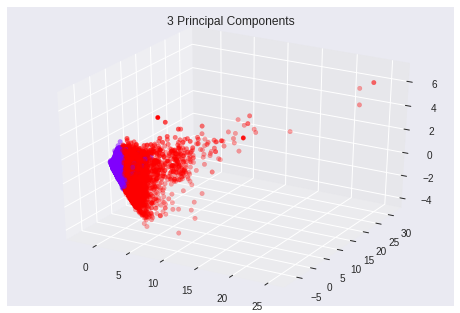

In [1432]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('3 Principal Components')
ax.scatter(pca_3_df.pc1, pca_3_df.pc2, pca_3_df.pc3, c=pca_3_df['2_means_label'])

plt.set_cmap('rainbow');

In [1433]:
# about the same as without pca2_2_means_label
features = ['sqft_living_squared', 'grade_squared', 'pca2_2_means_label']
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(231571.43056845307, 0.6044598009057299, 53625327455.519875)

In [0]:
df['has_basement'] = (df.sqft_basement > 0)

In [1435]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront']
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(229552.40745123613, 0.5951929254353021, 52694307766.65833)

In [0]:
df['view_4'] = (df.view == 4)
df['view_0'] = (df.view == 0)
df['view_2'] = (df.view == 2)


In [1437]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0']
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(218825.03226122836, 0.6271331634351758, 47884394744.12764)

In [1438]:
df.condition.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [0]:
df['condition_1or2'] = ((df.condition == 1) | (df.condition ==2))

In [1440]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2']
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(227416.75679097083, 0.6384992737303354, 51718381269.32358)

In [1441]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_since_built,log_price,sqft_living_squared,sqft_living_log,grade_squared,pca2_2_means_label,pca2_3_means_label,pca3_2_means_label,has_basement,view_4,view_0,view_2,condition_1or2
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59,12.309982,1392400,7.07327,49,0,1,0,False,False,True,False,False


In [1442]:
df['renovated'] = (df.yr_renovated > 0)
df.pivot_table(index='renovated', values='price')

,price
renovated,
False,530360.818155
True,760379.029540


In [1443]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated']
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(223484.47250876107, 0.6341061969415651, 49945309452.51919)

In [1444]:
df['year_sold'] = pd.to_datetime(df.date).dt.year
df.year_sold.value_counts()

2014    14633
2015     6980
Name: year_sold, dtype: int64

In [1445]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold']
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(221331.79424803163, 0.6307096260595506, 48987763145.053)

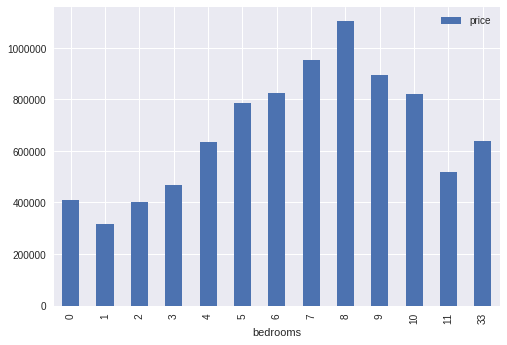

In [1446]:
df.pivot_table(index='bedrooms', values='price').plot.bar()

In [1447]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [0]:
df['bedrooms_missing'] = (df.bedrooms == 0)
df['bedrooms_alot'] = (df.bedrooms >= 9)
df['bedrooms_1'] = (df.bedrooms == 1)
df['bedrooms_2'] = (df.bedrooms == 2)
df['bedrooms_3'] = (df.bedrooms == 3)
df['bedrooms_4'] = (df.bedrooms == 4)
df['bedrooms_5'] = (df.bedrooms == 5)
df['bedrooms_6'] = (df.bedrooms == 6)
df['bedrooms_7'] = (df.bedrooms == 7)
df['bedrooms_8'] = (df.bedrooms == 8)

In [1449]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(224573.56429736642, 0.6406402915983549, 50433285781.22337)

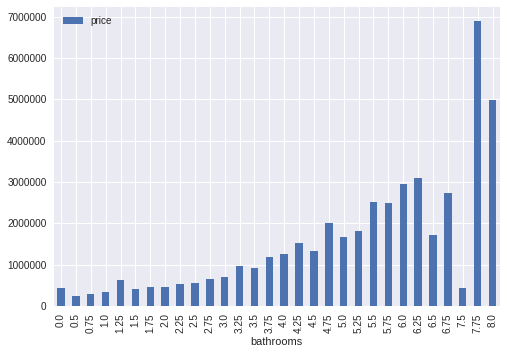

In [1450]:
df.pivot_table(index='bathrooms', values='price').plot.bar()

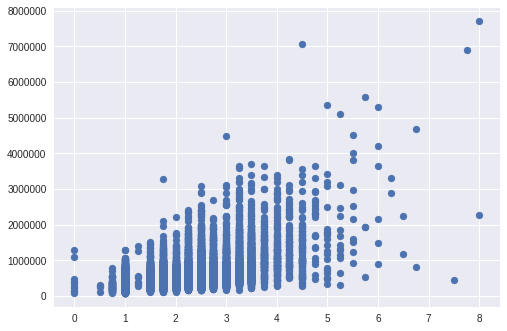

In [1451]:
plt.scatter(df.bathrooms, df.price)

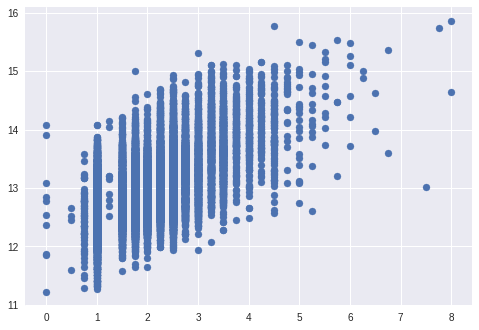

In [1452]:
plt.scatter(df.bathrooms, df.log_price)

In [0]:
df['bathrooms_squared'] = df.bathrooms ** 2

In [1454]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(224199.1466319374, 0.6341412993561608, 50265257350.48896)

In [0]:
df['old_not_renovated'] = df.yrs_since_built * df.renovated

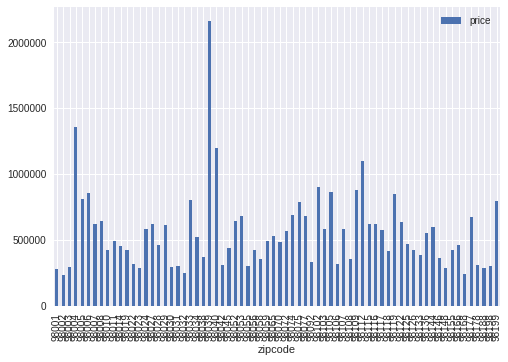

In [1456]:
df.pivot_table(index='zipcode', values='price').plot.bar()

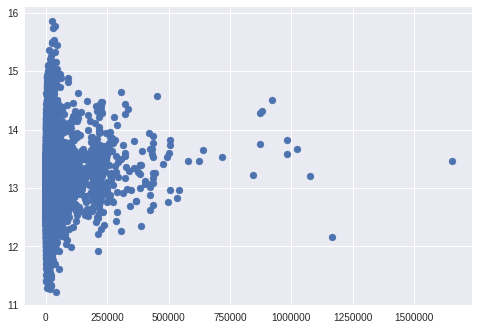

In [1457]:
plt.scatter(df.sqft_lot, df.log_price)

In [1458]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_lot']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(214846.93798571185, 0.6478155730596848, 46159206761.83631)

In [0]:
df['sqft_interaction'] = df.sqft_living_squared * df.sqft_lot

In [1460]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(217301.0057711901, 0.6422992762122036, 47219727109.17079)

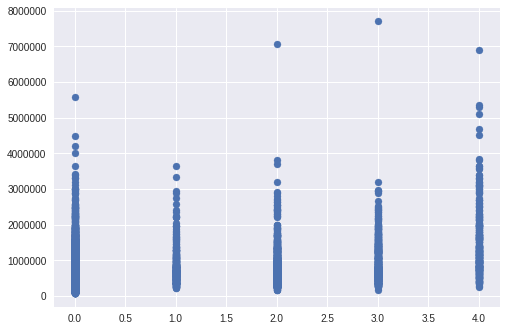

In [1461]:
plt.scatter(df.view, df.price)

In [0]:
df['view_grade_interaction'] = df.view * df.grade_squared

In [0]:
df.floors = df.floors.map({1:1, 1.5:1.5, 2:2, 3.5: 2.5, 3.0:2.5})

In [0]:
df.floors = df.floors.fillna(2.5)

In [1465]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'floors']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(216210.0708513509, 0.6586613689601599, 46746794737.54617)

In [1466]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_since_built,log_price,sqft_living_squared,sqft_living_log,grade_squared,pca2_2_means_label,pca2_3_means_label,pca3_2_means_label,has_basement,view_4,view_0,view_2,condition_1or2,renovated,year_sold,bedrooms_missing,bedrooms_alot,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bathrooms_squared,old_not_renovated,sqft_interaction,view_grade_interaction
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59,12.309982,1392400,7.073270,49,0,1,0,False,False,True,False,False,False,2014,False,False,False,False,True,False,False,False,False,False,1.0000,0,7867060000,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63,13.195614,6604900,7.851661,49,0,1,0,True,False,True,False,False,True,2014,False,False,False,False,True,False,False,False,False,False,5.0625,63,47832685800,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82,12.100712,592900,6.646391,36,0,1,0,False,False,True,False,False,False,2015,False,False,False,True,False,False,False,False,False,False,1.0000,0,5929000000,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49,13.311329,3841600,7.580700,49,0,1,0,True,False,True,False,False,False,2014,False,False,False,False,False,True,False,False,False,False,9.0000,0,19208000000,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28,13.142166,2822400,7.426549,64,0,1,0,False,False,True,False,False,False,2015,False,False,False,False,True,False,False,False,False,False,4.0000,0,22804992000,0


In [1467]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [1468]:
df.bedrooms.describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [1469]:
df[df.bedrooms == 3].price.mean()

466232.07848127035

In [0]:
df.bedrooms = df.bedrooms.replace({33:4, 11:3})

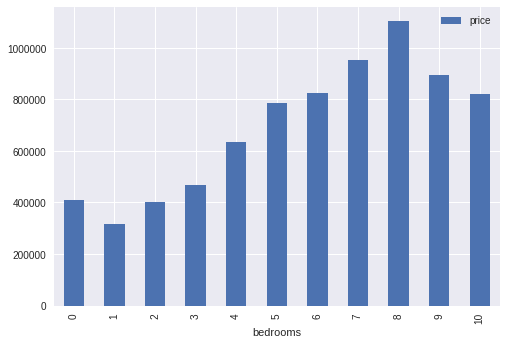

In [1471]:
df.pivot_table(index='bedrooms', values='price').plot.bar()

In [0]:
df.bedrooms = df.bedrooms.replace({8:7, 9:7, 10:7})

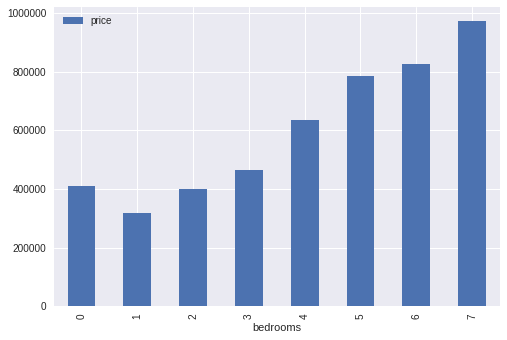

In [1473]:
df.pivot_table(index='bedrooms', values='price').plot.bar()

In [1474]:
(df.bedrooms / df.sqft_living_log).dropna().median()

/usr/local/lib/python3.6/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


0.41840306592108295

In [0]:
df['bedrooms_per_sqfoot_median'] = (df.bedrooms / df.sqft_living).dropna().median()


In [0]:
df['bedrooms_zero'] = (df.bedrooms == 0)
df['bedrooms_one'] = (df.bedrooms == 1)
df['bedrooms_two'] = (df.bedrooms == 2)
df['bedrooms_three_more'] = (df.bedrooms >= 3)

In [1477]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one', 'bedrooms_two']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(222017.8691939469, 0.6585138501346786, 49291934241.42052)

In [0]:
df['bedrooms_one_or_two'] = ((df.bedrooms == 1) | (df.bedrooms == 2))

In [1479]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(219275.25913466417, 0.6502968859149394, 48081639268.57412)

In [0]:
df['month'] = pd.to_datetime(df.date).dt.month

In [0]:
# handle zip codes because this is annoying

In [1482]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_since_built,log_price,sqft_living_squared,sqft_living_log,grade_squared,pca2_2_means_label,pca2_3_means_label,pca3_2_means_label,has_basement,view_4,view_0,view_2,condition_1or2,renovated,year_sold,bedrooms_missing,bedrooms_alot,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bathrooms_squared,old_not_renovated,sqft_interaction,view_grade_interaction,bedrooms_per_sqfoot_median,bedrooms_zero,bedrooms_one,bedrooms_two,bedrooms_three_more,bedrooms_one_or_two,month
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59,12.309982,1392400,7.073270,49,0,1,0,False,False,True,False,False,False,2014,False,False,False,False,True,False,False,False,False,False,1.0000,0,7867060000,0,0.001734,False,False,False,True,False,10
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63,13.195614,6604900,7.851661,49,0,1,0,True,False,True,False,False,True,2014,False,False,False,False,True,False,False,False,False,False,5.0625,63,47832685800,0,0.001734,False,False,False,True,False,12
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82,12.100712,592900,6.646391,36,0,1,0,False,False,True,False,False,False,2015,False,False,False,True,False,False,False,False,False,False,1.0000,0,5929000000,0,0.001734,False,False,True,False,True,2
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49,13.311329,3841600,7.580700,49,0,1,0,True,False,True,False,False,False,2014,False,False,False,False,False,True,False,False,False,False,9.0000,0,19208000000,0,0.001734,False,False,False,True,False,12
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28,13.142166,2822400,7.426549,64,0,1,0,False,False,True,False,False,False,2015,False,False,False,False,True,False,False,False,False,False,4.0000,0,22804992000,0,0.001734,False,False,False,True,False,2


In [0]:
df['yrs_since_built_squared'] = df.yrs_since_built ** 2

In [1484]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(201727.7978161789, 0.7047620307656234, 40694104411.76515)

In [1485]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(211275.5115319347, 0.6863670404886875, 44637341773.080666)

In [0]:
df['sqft_living15_squared'] = df.sqft_living15 ** 2

In [1487]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(202910.0364019594, 0.678918457350682, 41172482872.64449)

In [0]:
df['sqftliving_sqftliving15_interaction'] = df.sqft_living_squared - df.sqft_living15_squared

In [1489]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(205883.7056617564, 0.6958392598774261, 42388100257.01674)

In [1490]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_since_built,log_price,sqft_living_squared,sqft_living_log,grade_squared,pca2_2_means_label,pca2_3_means_label,pca3_2_means_label,has_basement,view_4,view_0,view_2,condition_1or2,renovated,year_sold,bedrooms_missing,bedrooms_alot,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bathrooms_squared,old_not_renovated,sqft_interaction,view_grade_interaction,bedrooms_per_sqfoot_median,bedrooms_zero,bedrooms_one,bedrooms_two,bedrooms_three_more,bedrooms_one_or_two,month,yrs_since_built_squared,sqft_living15_squared,sqftliving_sqftliving15_interaction
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59,12.309982,1392400,7.073270,49,0,1,0,False,False,True,False,False,False,2014,False,False,False,False,True,False,False,False,False,False,1.0000,0,7867060000,0,0.001734,False,False,False,True,False,10,3481,1795600,-403200
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63,13.195614,6604900,7.851661,49,0,1,0,True,False,True,False,False,True,2014,False,False,False,False,True,False,False,False,False,False,5.0625,63,47832685800,0,0.001734,False,False,False,True,False,12,3969,2856100,3748800
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82,12.100712,592900,6.646391,36,0,1,0,False,False,True,False,False,False,2015,False,False,False,True,False,False,False,False,False,False,1.0000,0,5929000000,0,0.001734,False,False,True,False,True,2,6724,7398400,-6805500
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49,13.311329,3841600,7.580700,49,0,1,0,True,False,True,False,False,False,2014,False,False,False,False,False,True,False,False,False,False,9.0000,0,19208000000,0,0.001734,False,False,False,True,False,12,2401,1849600,1992000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28,13.142166,2822400,7.426549,64,0,1,0,False,False,True,False,False,False,2015,False,False,False,False,True,False,False,False,False,False,4.0000,0,22804992000,0,0.001734,False,False,False,True,False,2,784,3240000,-417600


In [0]:
km = KMeans(5)
km = km.fit(df[['lat','long']])

df['five_dif_locations'] = km.labels_

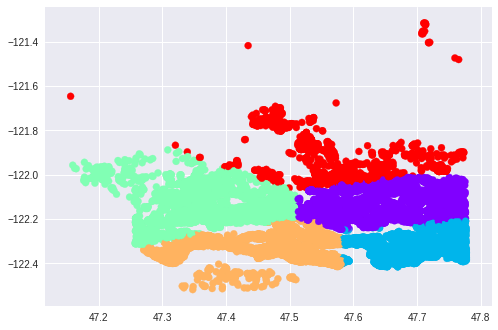

In [1492]:
plt.scatter(df.lat,df.long, c=df.five_dif_locations)

In [0]:
df['loc1'] = (df.five_dif_locations == 0)
df['loc2'] = (df.five_dif_locations == 1)
df['loc3'] = (df.five_dif_locations == 2)
df['loc4'] = (df.five_dif_locations == 3)
df['loc5'] = (df.five_dif_locations == 4)

In [1494]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(181538.79710028475, 0.7537912556437469, 32956334852.618355)

In [1495]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_since_built,log_price,sqft_living_squared,sqft_living_log,grade_squared,pca2_2_means_label,pca2_3_means_label,pca3_2_means_label,has_basement,view_4,view_0,view_2,condition_1or2,renovated,year_sold,bedrooms_missing,bedrooms_alot,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bathrooms_squared,old_not_renovated,sqft_interaction,view_grade_interaction,bedrooms_per_sqfoot_median,bedrooms_zero,bedrooms_one,bedrooms_two,bedrooms_three_more,bedrooms_one_or_two,month,yrs_since_built_squared,sqft_living15_squared,sqftliving_sqftliving15_interaction,five_dif_locations,loc1,loc2,loc3,loc4,loc5
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59,12.309982,1392400,7.073270,49,0,1,0,False,False,True,False,False,False,2014,False,False,False,False,True,False,False,False,False,False,1.0000,0,7867060000,0,0.001734,False,False,False,True,False,10,3481,1795600,-403200,3,False,False,False,True,False
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63,13.195614,6604900,7.851661,49,0,1,0,True,False,True,False,False,True,2014,False,False,False,False,True,False,False,False,False,False,5.0625,63,47832685800,0,0.001734,False,False,False,True,False,12,3969,2856100,3748800,1,False,True,False,False,False
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82,12.100712,592900,6.646391,36,0,1,0,False,False,True,False,False,False,2015,False,False,False,True,False,False,False,False,False,False,1.0000,0,5929000000,0,0.001734,False,False,True,False,True,2,6724,7398400,-6805500,1,False,True,False,False,False
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49,13.311329,3841600,7.580700,49,0,1,0,True,False,True,False,False,False,2014,False,False,False,False,False,True,False,False,False,False,9.0000,0,19208000000,0,0.001734,False,False,False,True,False,12,2401,1849600,1992000,3,False,False,False,True,False
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28,13.142166,2822400,7.426549,64,0,1,0,False,False,True,False,False,False,2015,False,False,False,False,True,False,False,False,False,False,4.0000,0,22804992000,0,0.001734,False,False,False,True,False,2,784,3240000,-417600,0,True,False,False,False,False


In [1496]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(188091.67692507946, 0.7348056560341407, 35378478928.488464)

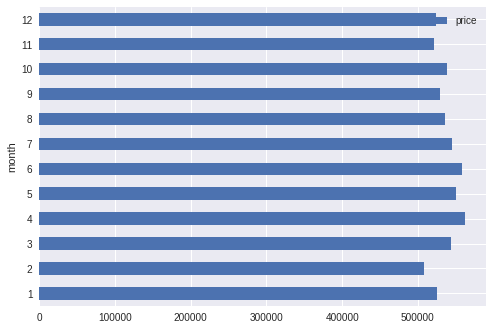

In [1497]:
df.pivot_table(index='month', values='price').plot.barh()

In [0]:
df['is_winter_months'] = ((df.month >= 11) | (df.month <= 2))

In [1499]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4', 'is_winter_months']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(187490.9024535761, 0.7497739242295478, 35152838502.856384)

In [0]:
df['floors_abv_ground'] = df.floors - df.has_basement

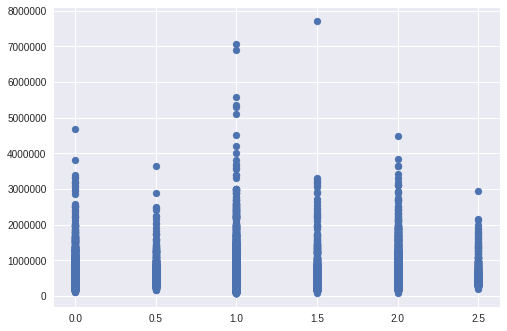

In [1501]:
plt.scatter(df.floors_abv_ground, df.price)

In [0]:
df['split_level_home'] = (df.floors_abv_ground == 0.5)

In [1503]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4', 'is_winter_months']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(184478.95673975602, 0.7517254087811112, 34032485479.788776)

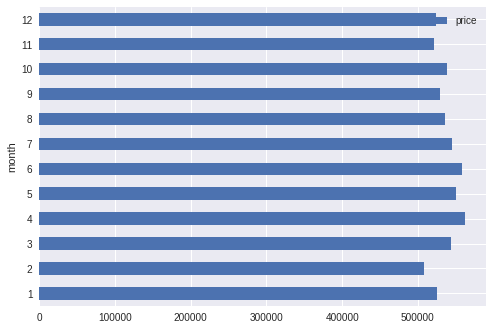

In [1504]:
df.pivot_table(index='month', values='price').plot.barh()

In [0]:
df['first_post_winter_szn'] = ((df.month >=4) & (df.month <=6))

In [1506]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4', 'is_winter_months',
            'first_post_winter_szn']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(180974.4959379764, 0.7563949497874679, 32751768180.00464)

In [1507]:
df.pivot_table(index='zipcode', values='price').sort_values('price', ascending=False)

,price
zipcode,
98039,2.160607e+06
98004,1.355927e+06
98040,1.194230e+06
98112,1.095499e+06
98102,9.012583e+05
98109,8.796236e+05
98105,8.628252e+05
98006,8.596848e+05
98119,8.494480e+05


In [1508]:
df[df.zipcode == 98039].shape
df[((df.zipcode == 98117) | (df.zipcode == 98107) | (df.zipcode == 98024) | (df.zipcode == 98103))]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_since_built,log_price,sqft_living_squared,sqft_living_log,grade_squared,pca2_2_means_label,pca2_3_means_label,pca3_2_means_label,has_basement,view_4,view_0,view_2,condition_1or2,renovated,year_sold,bedrooms_missing,bedrooms_alot,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bathrooms_squared,old_not_renovated,sqft_interaction,view_grade_interaction,bedrooms_per_sqfoot_median,bedrooms_zero,bedrooms_one,bedrooms_two,bedrooms_three_more,bedrooms_one_or_two,month,yrs_since_built_squared,sqft_living15_squared,sqftliving_sqftliving15_interaction,five_dif_locations,loc1,loc2,loc3,loc4,loc5,is_winter_months,floors_abv_ground,split_level_home,first_post_winter_szn
14,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,3,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,115,13.180632,3276100,7.501082,49,0,1,0,False,False,True,False,False,False,2015,False,False,False,False,False,False,True,False,False,False,4.0000,0,15889085000,0,0.001734,False,False,False,True,False,3,13225,1849600,1426500,1,False,True,False,False,False,False,1.5,False,False
17,6865200140,20140529T000000,485000.0,4,1.00,1600,4300,1.5,0,0,4,7,1600,0,1916,0,98103,47.6648,-122.343,1610,4300,98,13.091904,2560000,7.377759,49,0,1,0,False,False,True,False,False,False,2014,False,False,False,False,False,True,False,False,False,False,1.0000,0,11008000000,0,0.001734,False,False,False,True,False,5,9604,2592100,-32100,1,False,True,False,False,False,False,1.5,False,True
32,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,4,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000,85,13.440817,5428900,7.753624,49,0,1,0,True,False,True,False,False,False,2014,False,False,False,False,False,True,False,False,False,False,3.0625,0,27144500000,0,0.001734,False,False,False,True,False,6,7225,2131600,3297300,1,False,True,False,False,False,False,0.5,True,True
33,7589200193,20141110T000000,535000.0,3,1.00,1090,3000,1.5,0,0,4,8,1090,0,1929,0,98117,47.6889,-122.375,1570,5080,85,13.190022,1188100,6.993933,64,0,1,0,False,False,True,False,False,False,2014,False,False,False,False,True,False,False,False,False,False,1.0000,0,3564300000,0,0.001734,False,False,False,True,False,11,7225,2464900,-1276800,1,False,True,False,False,False,True,1.5,False,False
37,2768000400,20141230T000000,640000.0,4,2.00,2360,6000,2.0,0,0,4,8,2360,0,1904,0,98107,47.6702,-122.362,1730,4700,110,13.369223,5569600,7.766417,64,0,1,0,False,False,True,False,False,False,2014,False,False,False,False,False,True,False,False,False,False,4.0000,0,33417600000,0,0.001734,False,False,False,True,False,12,12100,2992900,2576700,1,False,True,False,False,False,True,2.0,False,False
52,7518505990,20141231T000000,600000.0,3,1.75,1410,4080,1.0,0,0,4,7,1000,410,1950,0,98117,47.6808,-122.384,1410,4080,64,13.304685,1988100,7.251345,49,0,1,0,True,False,True,False,False,False,2014,False,False,False,False,True,False,False,False,False,False,3.0625,0,8111448000,0,0.001734,False,False,False,True,False,12,4096,1988100,0,1,False,True,False,False,False,True,0.0,False,False
53,3626039271,20150205T000000,585000.0,2,1.75,1980,8550,1.0,0,0,3,7,990,990,1981,0,98117,47.6989,-122.369,1480,6738,34,13.279367,3920400,7.590852,49,0,1,0,True,False,True,False,False,False,2015,False,False,False,True,False,False,False,False,False,False,3.0625,0,33519420000,0,0.001734,False,False,True,False,True,2,1156,2190400,1730000,1,False,True,False,False,False,True,0.0,False,False
93,6021501535,20140725T000000,430000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,75,12.971540,2496400,7.365180,64,0,1,0,True,False,True,False,False,False,2014,False,False,False,False,True,False,False,False,False,False,2.2500,0,12482000000,0,0.001734,False,False,False,True,False,7,5625,2464900,31500,1,False,True,False,False,False,False,0.0,False,Fa

In [0]:
df['zip_98039'] = (df.zipcode == 98039)
df['bad_zips'] = ((df.zipcode == 98117) | (df.zipcode == 98107) | (df.zipcode == 98024) | (df.zipcode == 98103))

In [1510]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4', 'is_winter_months',
            'first_post_winter_szn', 'zip_98039']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(176069.04609331803, 0.75316438070098, 31000308992.210945)

In [1511]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'view_0', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4', 'is_winter_months',
            'first_post_winter_szn', 'zip_98039', 'bad_zips']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(178099.114969164, 0.7593143426272607, 31719294752.79949)

In [1512]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4', 'is_winter_months',
            'first_post_winter_szn', 'zip_98039', 'bad_zips', 'view_0']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(175925.39548638058, 0.7711233554085246, 30949744777.039417)

In [1513]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'condition_1or2', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4', 'is_winter_months',
            'first_post_winter_szn', 'zip_98039', 'bad_zips', 'view_0','pca3_2_means_label']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(179479.43623931965, 0.7656964224412557, 32212868032.784004)

In [1514]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_since_built,log_price,sqft_living_squared,sqft_living_log,grade_squared,pca2_2_means_label,pca2_3_means_label,pca3_2_means_label,has_basement,view_4,view_0,view_2,condition_1or2,renovated,year_sold,bedrooms_missing,bedrooms_alot,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bathrooms_squared,old_not_renovated,sqft_interaction,view_grade_interaction,bedrooms_per_sqfoot_median,bedrooms_zero,bedrooms_one,bedrooms_two,bedrooms_three_more,bedrooms_one_or_two,month,yrs_since_built_squared,sqft_living15_squared,sqftliving_sqftliving15_interaction,five_dif_locations,loc1,loc2,loc3,loc4,loc5,is_winter_months,floors_abv_ground,split_level_home,first_post_winter_szn,zip_98039,bad_zips
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59,12.309982,1392400,7.073270,49,0,1,0,False,False,True,False,False,False,2014,False,False,False,False,True,False,False,False,False,False,1.0000,0,7867060000,0,0.001734,False,False,False,True,False,10,3481,1795600,-403200,3,False,False,False,True,False,False,1.0,False,False,False,False
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63,13.195614,6604900,7.851661,49,0,1,0,True,False,True,False,False,True,2014,False,False,False,False,True,False,False,False,False,False,5.0625,63,47832685800,0,0.001734,False,False,False,True,False,12,3969,2856100,3748800,1,False,True,False,False,False,True,1.0,False,False,False,False
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82,12.100712,592900,6.646391,36,0,1,0,False,False,True,False,False,False,2015,False,False,False,True,False,False,False,False,False,False,1.0000,0,5929000000,0,0.001734,False,False,True,False,True,2,6724,7398400,-6805500,1,False,True,False,False,False,True,1.0,False,False,False,False
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49,13.311329,3841600,7.580700,49,0,1,0,True,False,True,False,False,False,2014,False,False,False,False,False,True,False,False,False,False,9.0000,0,19208000000,0,0.001734,False,False,False,True,False,12,2401,1849600,1992000,3,False,False,False,True,False,True,0.0,False,False,False,False
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28,13.142166,2822400,7.426549,64,0,1,0,False,False,True,False,False,False,2015,False,False,False,False,True,False,False,False,False,False,4.0000,0,22804992000,0,0.001734,False,False,False,True,False,2,784,3240000,-417600,0,True,False,False,False,False,True,1.0,False,False,False,False


In [0]:
df['condition_engineered'] = df.condition ** 2

In [0]:
df['condition_engineered'] = df.condition_engineered.replace({16: 9, 25:9})

In [1517]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4', 'is_winter_months',
            'first_post_winter_szn', 'zip_98039', 'bad_zips', 'view_0','pca3_2_means_label', 'condition_engineered']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(175947.77635203095, 0.7738984114172949, 30957620003.224304)

In [0]:
df['condition_engineered_grade_interaction'] = df.grade_squared * df.condition_engineered

In [1519]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4', 'is_winter_months',
            'first_post_winter_szn', 'zip_98039', 'bad_zips', 'view_0','pca3_2_means_label', 'condition_engineered', 'condition_engineered_grade_interaction']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(182124.17412149766, 0.769083629456305, 33169214799.437603)

In [0]:
# more testing 

eng_df = df.copy()

eng_df = eng_df.drop(['date', 'id'],axis=1)

In [0]:
targets = eng_df.price
inputs = eng_df.drop('price',axis=1)


In [1522]:
from sklearn.ensemble import RandomForestRegressor


eng_df = df.copy()
eng_df = eng_df.drop(['date', 'id', 'log_price'],axis=1)

targets = eng_df.price
inputs = eng_df.drop('price',axis=1)


X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.5)

rfg = RandomForestRegressor(n_estimators=30, max_depth=15)
rfg.fit(X_train, y_train)

oos_pred = rfg.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(132065.53052490423, 0.867935462740095, 17441304352.824413)

In [0]:
df['brand_new'] = (pd.to_datetime(df.yr_built).dt.year == 2014)

In [1524]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4', 'is_winter_months',
            'first_post_winter_szn', 'zip_98039', 'bad_zips', 'view_0','pca3_2_means_label', 'condition_engineered', 'condition_engineered_grade_interaction', 'brand_new']
    
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(176232.00802810123, 0.7767807946991151, 31057720653.61674)

In [1525]:
from sklearn.ensemble import RandomForestRegressor


eng_df = df.copy()
eng_df = eng_df.drop(['date', 'id', 'log_price'],axis=1)

targets = eng_df.price
inputs = eng_df.drop('price',axis=1)


X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.5)

rfg = RandomForestRegressor(n_estimators=30, max_depth=15)
rfg.fit(X_train, y_train)

oos_pred = rfg.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(131724.54298549306, 0.8634169493017432, 17351355224.73701)

In [1173]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_since_built,log_price,sqft_living_squared,sqft_living_log,grade_squared,pca2_2_means_label,pca2_3_means_label,pca3_2_means_label,has_basement,view_4,view_0,view_2,condition_1or2,renovated,year_sold,bedrooms_missing,bedrooms_alot,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bathrooms_squared,old_not_renovated,sqft_interaction,view_grade_interaction,bedrooms_per_sqfoot_median,bedrooms_zero,bedrooms_one,bedrooms_two,bedrooms_three_more,bedrooms_one_or_two,month,yrs_since_built_squared,sqft_living15_squared,sqftliving_sqftliving15_interaction,five_dif_locations,loc1,loc2,loc3,loc4,loc5,is_winter_months,floors_abv_ground,split_level_home,first_post_winter_szn,zip_98039,bad_zips,years_since_renovation,condition_engineered,condition_engineered_grade_interaction,brand_new
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59,12.309982,1392400,7.073270,49,0,1,0,False,False,True,False,False,False,2014,False,False,False,False,True,False,False,False,False,False,1.0000,0,7867060000,0,0.001734,False,False,False,True,False,10,3481,1795600,-403200,3,False,False,False,True,False,False,1.0,False,False,False,False,4056196,9,441,False
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63,13.195614,6604900,7.851661,49,0,1,0,True,False,True,False,False,True,2014,False,False,False,False,True,False,False,False,False,False,5.0625,63,47832685800,0,0.001734,False,False,False,True,False,12,3969,2856100,3748800,0,True,False,False,False,False,True,1.0,False,False,False,False,529,9,441,False
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82,12.100712,592900,6.646391,36,0,1,0,False,False,True,False,False,False,2015,False,False,False,True,False,False,False,False,False,False,1.0000,0,5929000000,0,0.001734,False,False,True,False,True,2,6724,7398400,-6805500,0,True,False,False,False,False,True,1.0,False,False,False,False,4060225,9,324,False
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49,13.311329,3841600,7.580700,49,0,1,0,True,False,True,False,False,False,2014,False,False,False,False,False,True,False,False,False,False,9.0000,0,19208000000,0,0.001734,False,False,False,True,False,12,2401,1849600,1992000,3,False,False,False,True,False,True,0.0,False,False,False,False,4056196,9,441,False
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28,13.142166,2822400,7.426549,64,0,1,0,False,False,True,False,False,False,2015,False,False,False,False,True,False,False,False,False,False,4.0000,0,22804992000,0,0.001734,False,False,False,True,False,2,784,3240000,-417600,1,False,True,False,False,False,True,1.0,False,False,False,False,4060225,9,576,False


In [0]:
# 70 unique zip codes, lets do 30 kmeans off of them

km = KMeans(30)
km = km.fit(df[['lat', 'long']])
df['thirty_dif_loc'] = km.labels_

In [0]:
df['weekday'] = pd.to_datetime(df.date).dt.weekday

In [0]:
df['is_saturday'] = (df.weekday == 6)

In [0]:
df['sqft_lot_squared'] = df.sqft_lot ** 2
df['sqft_livinglot_interaction'] = df.sqft_living_squared * df.sqft_lot_squared

In [0]:
df['sqft_land'] = df.sqft_lot - df.sqft_living

In [1531]:
from sklearn.ensemble import RandomForestRegressor


eng_df = df.copy()
eng_df = eng_df.drop(['date', 'id', 'log_price'],axis=1)

targets = eng_df.price
inputs = eng_df.drop('price',axis=1)


X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.5)

rfg = RandomForestRegressor(n_estimators=10)
rfg.fit(X_train, y_train)

oos_pred = rfg.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(141626.71331838597, 0.8566214752084045, 20058125925.368282)

In [0]:
df['sqft_change'] = (df.sqft_living15 != df.sqft_living)

In [1240]:
from sklearn.ensemble import RandomForestRegressor


eng_df = df.copy()
eng_df = eng_df.drop(['date', 'id', 'log_price'],axis=1)

targets = eng_df.price
inputs = eng_df.drop('price',axis=1)


X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.5)

rfg = RandomForestRegressor(n_estimators=30)
rfg.fit(X_train, y_train)

oos_pred = rfg.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(133953.78317223536, 0.8705507454558244, 17943616026.154243)

In [0]:
for zc in df.zipcode.unique():
  df['zipcode_' + str(zc)] = (df.zipcode == zc)

In [1248]:
from sklearn.ensemble import RandomForestRegressor


eng_df = df.copy()
eng_df = eng_df.drop(['date', 'id', 'log_price'],axis=1)

targets = eng_df.price
inputs = eng_df.drop('price',axis=1)


X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.5)

rfg = RandomForestRegressor(n_estimators=300)
rfg.fit(X_train, y_train)

oos_pred = rfg.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(126034.55480600045, 0.8810288639432284, 15884709005.14673)

In [0]:
df['sqft_above_squared'] = df.sqft_above ** 2

In [1535]:
features = ['sqft_living_squared', 'grade_squared', 'waterfront', 'renovated', 'year_sold', 'bathrooms', 'sqft_interaction',
            'view_grade_interaction', 'bedrooms_one_or_two', 'yrs_since_built_squared', 'sqft_living15_squared', 'loc1', 'loc2', 'loc3', 'loc4', 'is_winter_months',
            'first_post_winter_szn', 'zip_98039', 'bad_zips', 'view_0','pca3_2_means_label', 'condition_engineered', 'condition_engineered_grade_interaction',
            'sqft_land', 'sqft_above_squared']

target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)

oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(174214.66914151495, 0.7600994577352249, 30350750944.087524)

In [0]:
df['sqft_bsmt_squared'] = df.sqft_basement ** 2

In [0]:
from sklearn.ensemble import RandomForestRegressor


eng_df = df.copy()
eng_df = eng_df.drop(['date', 'id', 'log_price'],axis=1)

targets = eng_df.price
inputs = eng_df.drop('price',axis=1)


X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.5)

rfg = RandomForestRegressor(n_estimators=300)
rfg.fit(X_train, y_train)

oos_pred = rfg.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

In [1273]:
from sklearn.ensemble import RandomForestRegressor


eng_df = df.copy()
eng_df = eng_df.drop(['date', 'id', 'log_price'],axis=1)

targets = eng_df.price
inputs = eng_df.drop(['price', 'lat', 'long'],axis=1)


X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.5)

rfg = RandomForestRegressor(n_estimators=300)
rfg.fit(X_train, y_train)

oos_pred = rfg.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(129656.86505404844, 0.8680436934542709, 16810902655.643726)

In [0]:
df = df[df.bedrooms != 0]
df['bed_plus_bath'] = df.bedrooms + df.bathrooms
df['sqft_living_per_room'] = df.sqft_living / df.bed_plus_bath

In [0]:
df['sqft_living_as_pct_lot'] = df.sqft_living / df.sqft_lot

In [1544]:
from sklearn.ensemble import RandomForestRegressor


eng_df = df.copy()
eng_df = eng_df.drop(['date', 'id', 'log_price'],axis=1)

targets = eng_df.price
inputs = eng_df.drop(['price', 'lat', 'long'],axis=1)


X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.5)

rfg = RandomForestRegressor(n_estimators=50)
rfg.fit(X_train, y_train)

oos_pred = rfg.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(137577.65469823455, 0.8539768870799195, 18927611072.26666)

In [0]:
df['wacky_bed_bath'] = (df.bed_plus_bath == 0)

In [0]:
from sklearn.ensemble import RandomForestRegressor


eng_df = df.copy()
eng_df = eng_df.drop(['date', 'id'],axis=1)

targets = eng_df.price
inputs = eng_df.drop(['price', 'log_price'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.25)

rfg = RandomForestRegressor(n_estimators=30)
rfg.fit(X_train, y_train)

oos_pred = rfg.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

In [0]:
sqft = []
for col in list(df.columns):
  if 'sqft' in col:
    sqft.append(col)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(0, 1.03)

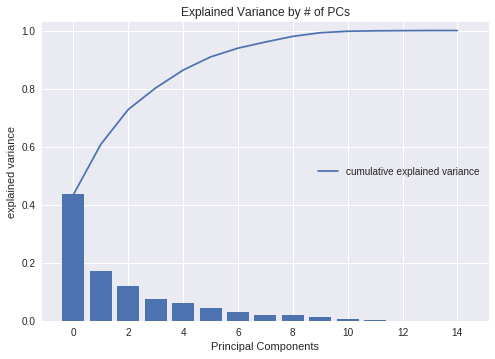

In [1549]:
sqft = []
for col in list(df.columns):
  if 'sqft' in col:
    sqft.append(col)
std_sc = StandardScaler()
df_std = std_sc.fit_transform(df[sqft])

pca_all = PCA(15)
pc_all = pca_all.fit_transform(X=df_std)

plt.bar(range(0,15), pca_all.explained_variance_ratio_)
plt.plot(range(0,15), [sum(pca_all.explained_variance_ratio_[0:i]) for i in range(1,16)], label='cumulative explained variance')

plt.xlabel('Principal Components')
plt.ylabel('explained variance')
plt.title('Explained Variance by # of PCs')
plt.legend(loc=7)
plt.ylim(0,1.03)

In [0]:
pca_7_df = pd.DataFrame({'pc1': pc_all[:,0], 'pc2': pc_all[:,1], 'pc3': pc_all[:,2], 'pc4': pc_all[:,3], 'pc5': pc_all[:,4],'pc6': pc_all[:,5],'pc7': pc_all[:,6]})

In [0]:
for i in range(1,10):
  km = KMeans(i)
  km.fit(pca_7_df)
  df['pca7_'+str(i)+'means'] = km.labels_

In [1552]:
from sklearn.ensemble import RandomForestRegressor


eng_df = df.copy()
eng_df = eng_df.drop(['date', 'id'],axis=1)

targets = eng_df.price
inputs = eng_df.drop(['price', 'log_price'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.5)

rfg = RandomForestRegressor(n_estimators=50)
rfg.fit(X_train, y_train)

oos_pred = rfg.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(130109.02816472128, 0.8725289510879337, 16928359209.968237)

In [1553]:
from sklearn.ensemble import GradientBoostingRegressor

eng_df = df.copy()
eng_df = eng_df.drop(['date', 'id'],axis=1)

targets = eng_df.price
inputs = eng_df.drop(['price', 'log_price'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.5)

rfg = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=.1)
rfg.fit(X_train, y_train)

oos_pred = rfg.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse


(122292.85300076056, 0.8838942204320177, 14955541895.06563)

In [0]:
df['condition_squared'] = df.condition ** 2
df['sqft_lot_cubed'] = df.sqft_lot ** 3
df['sqft_living_cubed'] = df.sqft_living ** 3

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

eng_df = df.copy()
eng_df = eng_df.drop(['date', 'id'],axis=1)

targets = eng_df.price
inputs = eng_df.drop(['price', 'log_price'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.5)

rfg = GradientBoostingRegressor(n_estimators=300, max_depth=5, learning_rate=.1)
rfg.fit(X_train, y_train)

oos_pred = rfg.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

In [0]:
df['bed_bath_squared'] = df.bed_plus_bath ** 2
df['bedrooms_squared'] = df.bedrooms ** 2

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

eng_df = df.copy()
eng_df = eng_df.drop(['date', 'id'],axis=1)

targets = eng_df.price
inputs = eng_df.drop(['price', 'log_price'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.5)

rfg = GradientBoostingRegressor(n_estimators=300, max_depth=5, learning_rate=.1)
rfg.fit(X_train, y_train)

oos_pred = rfg.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

In [0]:
df['sqft_living_1.5'] = df.sqft_living ** 1.5

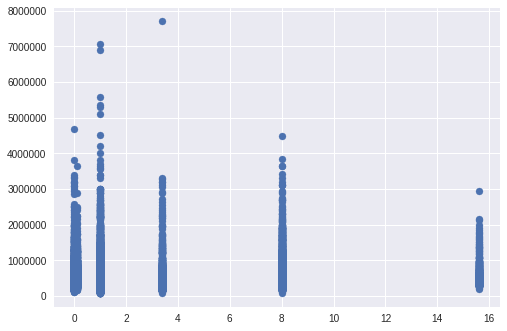

In [1388]:
plt.scatter(df.floors_abv_ground ** 3, df.price)

In [0]:
df['floors_abv_ground_squared'] = df.floors_abv_ground ** 2

In [1559]:
from sklearn.ensemble import GradientBoostingRegressor

eng_df = df.copy()
eng_df = eng_df.drop(['date', 'id'],axis=1)

targets = eng_df.price
inputs = eng_df.drop(['price', 'log_price'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.5)

rfg = GradientBoostingRegressor(n_estimators=300, max_depth=5, learning_rate=.1)
rfg.fit(X_train, y_train)

oos_pred = rfg.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(121923.10335672769, 0.8913009246212792, 14865243132.135302)

In [0]:
df['sqft_living_over_sqft_living15'] = df.sqft_living_squared / df.sqft_living15_squared

In [1562]:
from sklearn.ensemble import GradientBoostingRegressor

eng_df = df.copy()
eng_df = eng_df.drop(['date', 'id'],axis=1)

targets = eng_df.price
inputs = eng_df.drop(['price', 'log_price'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.5)

rfg = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=.1)
rfg.fit(X_train, y_train)

oos_pred = rfg.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2, oos_mse

(122019.41532008018, 0.8915701854464148, 14888737715.054216)